In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.special import expit
import unittest

%matplotlib inline
sns.set(style = 'whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14,8  #it handles the size of graph
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [17]:
def runTests():
    unittest.main(argv=[''],verbosity=1, exit=False 
                 )

In [68]:
data = OrderedDict(
        amountSpent = [50,10,20,5,95,70,100,200,0],
        sendDiscount = [0,1,1,1,0,0,0,0,1]
)

In [69]:
df = pd.DataFrame.from_dict(data)
df

,amountSpent,sendDiscount
0,50,0
1,10,1
2,20,1
3,5,1
4,95,0
5,70,0
6,100,0
7,200,0
8,0,1


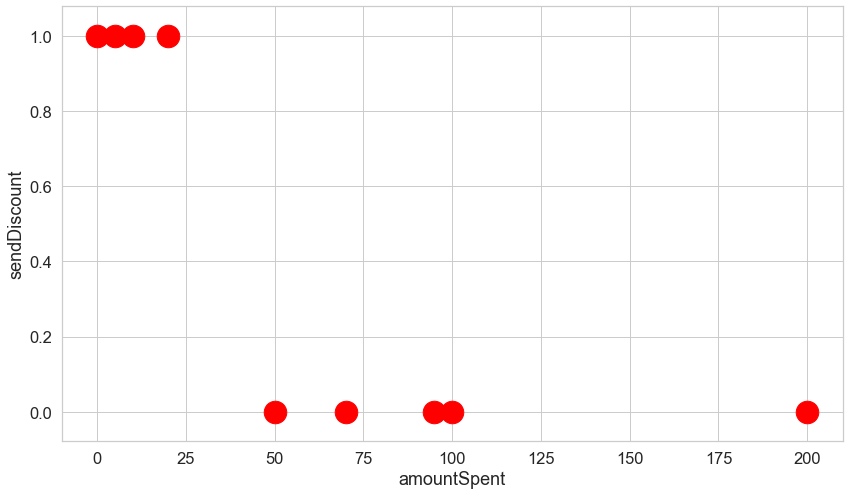

In [70]:
df.plot.scatter(x = 'amountSpent', y='sendDiscount', s= 508, c='red')

In [71]:
#define the sigmoid funciton
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [72]:
class TestSigmoid(unittest.TestCase):
    def testAtZero(self):
        self.assertAlmostEqual(sigmoid(0), 0.5)
        
    def testAtNegative(self):
        self.assertAlmostEqual(sigmoid(-100), 0)
        
    def testAtPositive(self):
        self.assertAlmostEqual(sigmoid(100), 1)

In [73]:
runTests()

loss: 0.6931471805599453 	
loss: 0.6568119804985231 	
loss: 0.6521146986124639 	
loss: 0.650630551223048 	
loss: 0.6500782216223302 	
loss: 0.6498588928160538 	
loss: 0.6497695510303033 	
loss: 0.6497327858824892 	
loss: 0.6497175938377503 	
loss: 0.6497113055161896 	


F...
FAIL: testCorrectPrediction (__main__.TestGradientDescent)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-49-f7a13d64d5d8>", line 9, in testCorrectPrediction
    self.assertTrue((y_hat == y).all())
AssertionError: False is not true

----------------------------------------------------------------------
Ran 4 tests in 4.490s

FAILED (failures=1)


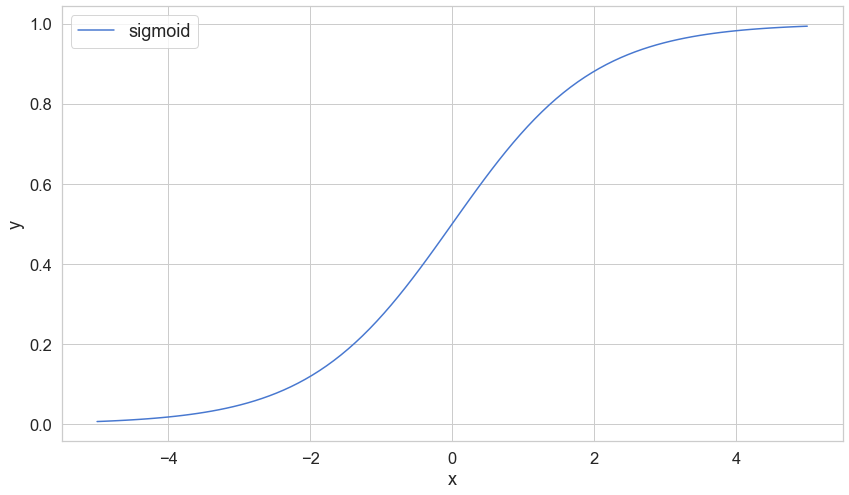

In [74]:
x = np.linspace(-5. , 5., num =100)
sig = sigmoid(x)

plt.plot(x, sig, label="sigmoid")
plt.xlabel("x")
plt.ylabel('y')
plt.legend(prop={'size': 18})
plt.show()

## Cost Function
We can compress the above function into one:

$$J(W) = \frac{1}{m}(-y \log{(h_w)} - (1 - y) \log{(1 - h_w)})$$
where

$$h_w(x) = g(w^Tx)$$
Let's implement it in Python:


In [75]:
def cost(h,y):
    return (-y * np.log(h) - (1-y)*np.log(1-h)).mean()

Now our task is to minimise the cost function to achieve the local minima

### Approach 1: THink of any three numbers
ie. w0, w1, w2

In [76]:
x = df['amountSpent'].astype('float').values
y = df['sendDiscount'].astype('float').values

def predict(x,w):
    return sigmoid(x*w)

def printResult(y_hat, y):
    print(f'loss: {np.round(cost(y_hat, y), 5)} predicted:{y_hat} actual:{y}')
    
    
    

In [77]:
y_hat= predict(x=x[0], w=0.5)
printResult(y_hat, y[0])

loss: 25.0 predicted:0.999999999986112 actual:0.0


THis is lazy approach
### Approach 2 : Try many numbers

In [78]:
for w in np.arange(-1,1, 0.1):
    y_hat = predict(x=x[0], w=w)
    print("cost is : ", cost(y_hat, y[0]))

cost is :  0.0
cost is :  0.0
cost is :  0.0
cost is :  6.661338147750941e-16
cost is :  9.359180097590508e-14
cost is :  1.3887890837434982e-11
cost is :  2.0611535832696244e-09
cost is :  3.059022736706331e-07
cost is :  4.539889921682063e-05
cost is :  0.006715348489118056
cost is :  0.6931471805599397
cost is :  5.006715348489103
cost is :  10.000045398900186
cost is :  15.000000305680194
cost is :  19.999999966169824
cost is :  24.99999582410784
cost is :  30.001020555434774
cost is :  34.945041100449046
cost is :  inf
cost is :  inf


C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


### APPROACH 3: Gradient Descent

THis is the suitable appproach to find the minimum cost function to reach the global minima

The parameter updating rule we're going to use is defined by:

$$W := W - \alpha (\frac{1}{m}(y - h_w)x)$$
The parameter $\alpha$ is known as learning rate. High learning rate can converge quickly, but risks overshooting the lowest point. Low learning rate allows for confident moves in the direction of the negative gradient. 

The gradient descent algorithm
Repeat until convergence {
  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights
}

In [79]:
def predict(x, w):
    return sigmoid(np.dot(x,w))

In [83]:
def fit(x, y, n_iter = 100000, alpha = 0.01):
    w = np.zeros(x.shape[1])
    for i in range(n_iter):
        z = np.dot(x,w)
        h = sigmoid(z)
        gradient = np.dot(x.T, (h-y))/y.size
        w -= alpha*gradient
        
    return w

In [84]:
class TestGradientDescent(unittest.TestCase):
    def testCorrectPrediction(self):
        global x
        global y
        if len(x.shape) !=2:
            x = x.reshape(x.shape[0], 1)
        w, _ = fit(x,y)
        y_hat = predict(x,w).round()
        self.assertTrue((y_hat == y).all())

In [85]:
runTests()

E...
ERROR: testCorrectPrediction (__main__.TestGradientDescent)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-84-f7a13d64d5d8>", line 7, in testCorrectPrediction
    w, _ = fit(x,y)
ValueError: not enough values to unpack (expected 2, got 1)

----------------------------------------------------------------------
Ran 4 tests in 4.518s

FAILED (errors=1)


Let's find whether our algo improves over time

In [86]:
def fit(x,y, n_iter =100000, alpha=0.001):
    w = np.zeros(x.shape[1])
    errors=[]
    for i in range(n_iter):
        z = np.dot(x,w)
        h = sigmoid(z)
        gradient = np.dot(x.T, (h-y))/y.size
        w = w- alpha*gradient
        
        if(i%10000 ==0):
            e=cost(h,y)
            print(f'loss: {e} \t')
            errors.append(e)
            
    return w, errors

In [87]:
runTests()

loss: 0.6931471805599453 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	


F...
FAIL: testCorrectPrediction (__main__.TestGradientDescent)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-84-f7a13d64d5d8>", line 9, in testCorrectPrediction
    self.assertTrue((y_hat == y).all())
AssertionError: False is not true

----------------------------------------------------------------------
Ran 4 tests in 4.471s

FAILED (failures=1)


loss: 0.6931471805599453 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	


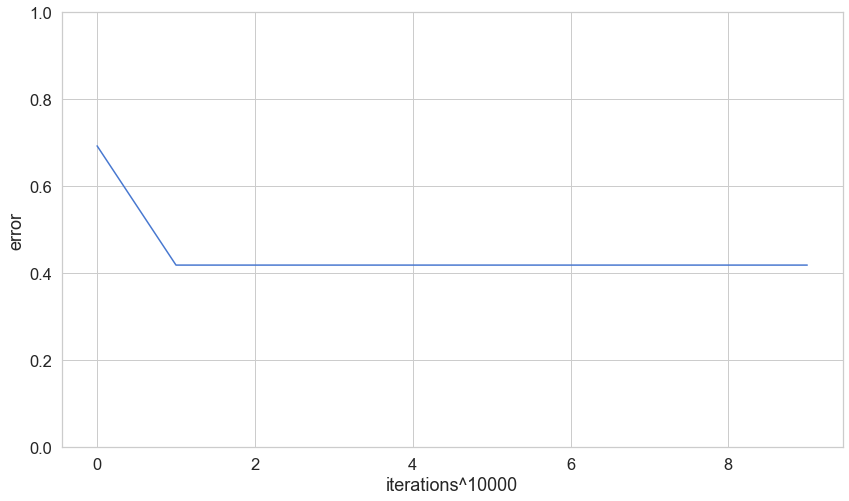

In [88]:
_, errors = fit(x,y)
plt.plot(np.arange(len(errors)), errors)
plt.xlabel('iterations^10000')
plt.ylabel('error')
plt.ylim(0,1)
plt.show()

 Our Algo gets stuck at some point
now we will try different learning rate

In [89]:
fit(x,y, n_iter=100000, alpha=0.0001)

loss: 0.6931471805599453 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	
loss: 0.4189928381863005 	


(array([-0.03328491]),
 [0.6931471805599453,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005,
  0.4189928381863005])

In [90]:
runTests()

loss: 0.6931471805599453 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	
loss: 0.41899283818630056 	


F...
FAIL: testCorrectPrediction (__main__.TestGradientDescent)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-84-f7a13d64d5d8>", line 9, in testCorrectPrediction
    self.assertTrue((y_hat == y).all())
AssertionError: False is not true

----------------------------------------------------------------------
Ran 4 tests in 4.281s

FAILED (failures=1)


Its not working here
SO lets add some more parameter

In [91]:
def addIntercept(x):
    intercept = np.ones((x.shape[0], 1))
    return np.concatenate((intercept, x), axis=1)


In [92]:
def predict(x,w):
    x = addIntercept(x)
    return sigmoid(np.dot(x,w))

def fit(x,y, n_iter =100000, alpha=0.001):
    x= addIntercept(x)
    w = np.zeros(x.shape[1])
    errors=[]
    for i in range(n_iter):
        z = np.dot(x,w)
        h = sigmoid(z)
        gradient = np.dot(x.T, (h-y))/y.size
        w = w- alpha*gradient
        
        if(i%10000 ==0):
            e=cost(h,y)
            print(f'loss: {e} \t')
            errors.append(e)
            
    return w, errors

In [93]:
runTests()

loss: 0.6931471805599453 	
loss: 0.18279088726991854 	
loss: 0.11579188669082319 	
loss: 0.08582643419749526 	
loss: 0.0688264240143766 	
loss: 0.05780903874411139 	
loss: 0.050047133304790194 	
loss: 0.04425868858658763 	
loss: 0.039760776418113764 	
loss: 0.036155448843673395 	


....
----------------------------------------------------------------------
Ran 4 tests in 4.268s

OK


loss: 0.6931471805599453 	
loss: 0.18279088726991854 	
loss: 0.11579188669082319 	
loss: 0.08582643419749526 	
loss: 0.0688264240143766 	
loss: 0.05780903874411139 	
loss: 0.050047133304790194 	
loss: 0.04425868858658763 	
loss: 0.039760776418113764 	
loss: 0.036155448843673395 	


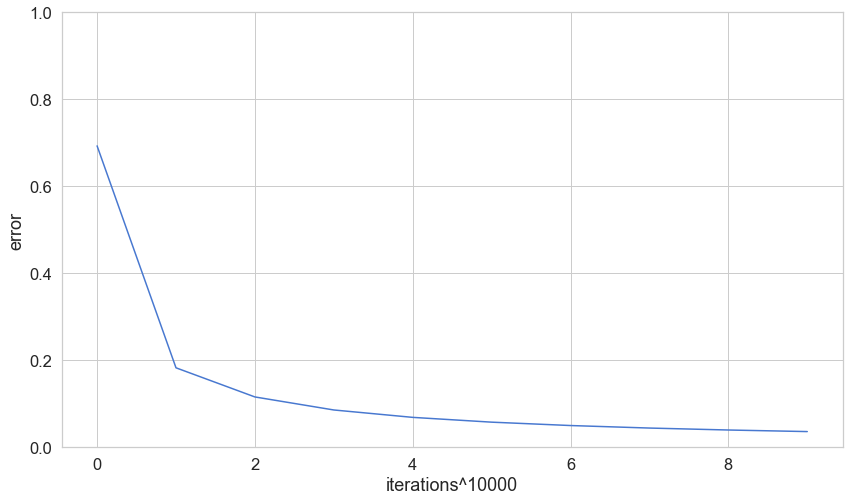

In [94]:
_, errors = fit(x,y)
plt.plot(np.arange(len(errors)), errors)
plt.xlabel('iterations^10000')
plt.ylabel('error')
plt.ylim(0,1)
plt.show()

yohooooo we done it

### Build Logistic Regression model

In [99]:
class LogisticRegressor:
    
    def _addIntercept(self, x):
        intercept = np.ones((x.shape[0],1))
        return np.concatenate((intercept, x), axis=1)
    
    def predictProb(self, x):
        x = self._addIntercept(x)
        return sigmoid(np.dot(x,self.w))
    
    def predict(self,x):
        return self.predictProb(x).round()
    
    def fit(self, x,y, n_iter=100000, lr=0.01):
        x = self._addIntercept(x)
        self.w = np.zeros(x.shape[1])
        
        for i in range(n_iter):
            z = np.dot(x,self.w)
            h = sigmoid(z)
            gradient = np.dot(x.T, (h-y))/y.size
            self.w -= lr *gradient
            
        return self

In [100]:
runTests()

loss: 0.6931471805599453 	
loss: 0.18279088726991854 	
loss: 0.11579188669082319 	
loss: 0.08582643419749526 	
loss: 0.0688264240143766 	
loss: 0.05780903874411139 	
loss: 0.050047133304790194 	
loss: 0.04425868858658763 	
loss: 0.039760776418113764 	
loss: 0.036155448843673395 	


....
----------------------------------------------------------------------
Ran 4 tests in 4.526s

OK


## Lets predict by our model

In [101]:
xTest = np.array([10,250])
xTest = xTest.reshape(xTest.shape[0], 1)
yTest = LogisticRegressor().fit(x,y).predict(xTest)

In [102]:
yTest

array([1., 0.])